In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import seaborn as sns

# set path to Figures
figures = os.path.join(os.getcwd(), 'Figures')
if not os.path.exists(figures):
    os.makedirs(figures)

# set style for seaborn and size of figures
sns.set(style="whitegrid")

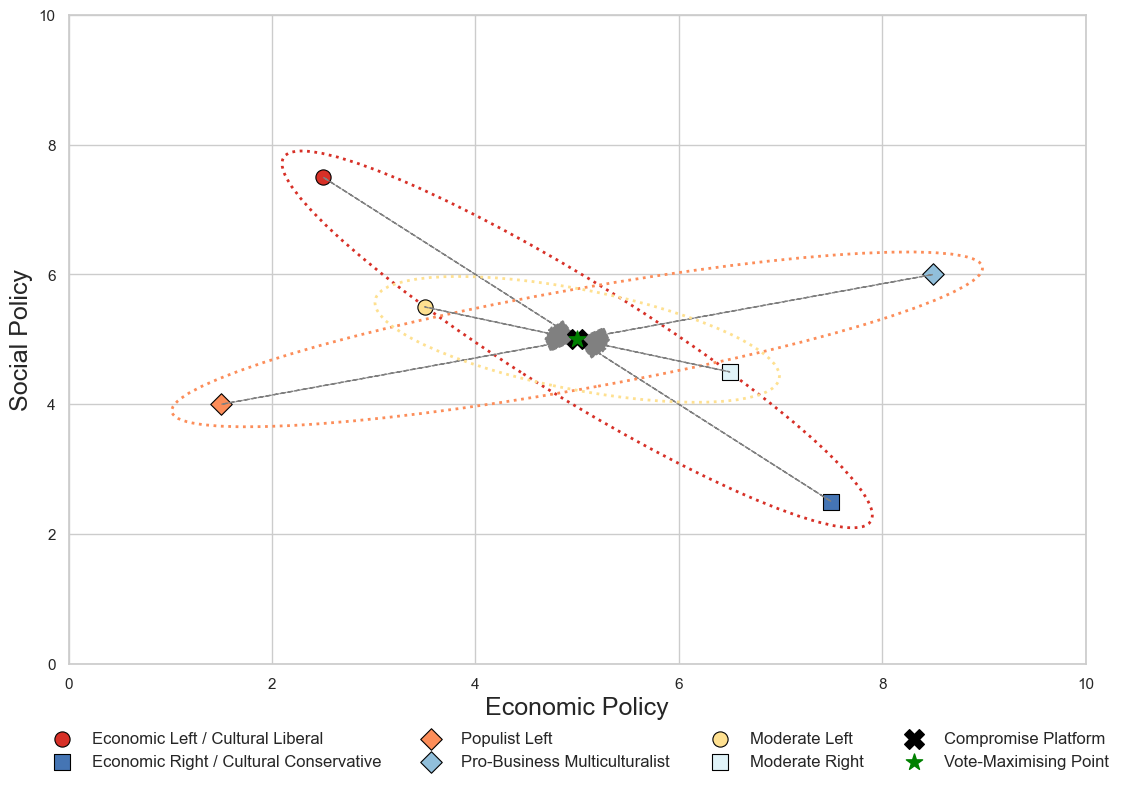

In [3]:
# Candidate positions and labels
candidate_pool = {
    "A": np.array([2.5, 7.5]),
    "B": np.array([7.5, 2.5]),
    "C": np.array([1.5, 4.0]),
    "D": np.array([8.5, 6.0]),
    "E": np.array([3.5, 5.5]),
    "F": np.array([6.5, 4.5])
}

# Descriptive ideological labels
candidate_labels = {
    "A": "Economic Left / Cultural Liberal",
    "B": "Economic Right / Cultural Conservative",
    "C": "Populist Left",
    "D": "Pro-Business Multiculturalist",
    "E": "Moderate Left",
    "F": "Moderate Right"
}

# Elegant color palette
elegant_colors = {
    "A": "#d73027",
    "B": "#4575b4",
    "C": "#fc8d59",
    "D": "#91bfdb",
    "E": "#fee090",
    "F": "#e0f3f8"
}

# Marker styles
markers = {
    "A": "o", "B": "s", "C": "D", "D": "D", "E": "o", "F": "s"
}

# Party assignments
assignment = {
    "Party 1": ["A", "B"],
    "Party 2": ["C", "D"],
    "Party 3": ["E", "F"]
}

# Shared compromise and vote-maximizing point
compromise_point = np.array([5, 5])
vote_max_point = np.array([5, 5])

# Function to draw a rotated ellipse between two points
def draw_rotated_ellipse(ax, point1, point2, color, label=None):
    center = (point1 + point2) / 2
    width = np.linalg.norm(point1 - point2) + 1
    height = 1.5
    angle = np.degrees(np.arctan2(point2[1] - point1[1], point2[0] - point1[0]))
    ellipse = patches.Ellipse(center, width, height, angle=angle,
                              linewidth=2, edgecolor=color, facecolor='none',
                              linestyle='dotted', label=label)
    ax.add_patch(ellipse)

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))
#ax.set_title("Illutrating the argument", fontsize=20)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Plot candidates, ellipses, and arrows
for party, members in assignment.items():
    p1 = candidate_pool[members[0]]
    p2 = candidate_pool[members[1]]
    ellipse_color = elegant_colors[members[0]]

    for m in members:
        point = candidate_pool[m]
        ax.scatter(*point, color=elegant_colors[m], s=120, marker=markers.get(m, 'o'),
                   label=candidate_labels[m], edgecolor='black', linewidth=0.8)
        ax.arrow(*point, *(compromise_point - point), head_width=0.2,
                 length_includes_head=True, fc='gray', ec='gray', linestyle='dashed')

    draw_rotated_ellipse(ax, p1, p2, color=ellipse_color)

# Compromise and vote-maximizing points
ax.scatter(*compromise_point, color='black', s=200, marker='X', label='Compromise Platform')
ax.scatter(*vote_max_point, color='green', s=150, marker='*', label='Vote-Maximising Point')

# Formatting
ax.set_xlabel('Economic Policy', fontsize=18)
ax.set_ylabel('Social Policy', fontsize=18)
ax.grid(True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=4, frameon=False, fontsize='medium')
plt.tight_layout()
plt.savefig(os.path.join(figures, 'candidate_positions.png'), dpi=300)
plt.show()